In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('../../data/Datafull train.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32849 entries, 0 to 32848
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0x      32849 non-null  float64
 1   0y      32849 non-null  float64
 2   1x      32849 non-null  float64
 3   1y      32849 non-null  float64
 4   2x      32849 non-null  float64
 5   2y      32849 non-null  float64
 6   3x      32849 non-null  float64
 7   3y      32849 non-null  float64
 8   4x      32849 non-null  float64
 9   4y      32849 non-null  float64
 10  5x      32849 non-null  float64
 11  5y      32849 non-null  float64
 12  6x      32849 non-null  float64
 13  6y      32849 non-null  float64
 14  7x      32849 non-null  float64
 15  7y      32849 non-null  float64
 16  8x      32849 non-null  float64
 17  8y      32849 non-null  float64
 18  9x      32849 non-null  float64
 19  9y      32849 non-null  float64
 20  10x     32849 non-null  float64
 21  10y     32849 non-null  float64
 22

In [31]:
df.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,449.894,638.530,329.537,588.029,262.366,475.709,253.967,343.421,247.663,236.477,...,475.346,591.398,426.475,592.339,341.419,548.671,413.658,541.039,454.239,NaN
1,459.426,638.641,347.614,599.550,273.522,486.969,262.374,354.810,248.102,248.011,...,471.021,587.605,425.540,598.047,337.165,559.660,410.858,548.164,455.238,A
2,444.194,659.268,326.598,616.910,253.226,497.914,243.082,361.876,239.491,259.676,...,476.613,560.803,418.030,567.584,346.090,533.656,416.844,524.283,450.811,A
3,443.780,650.429,324.970,607.825,252.818,487.201,244.345,356.561,243.655,256.638,...,473.187,573.173,418.568,580.205,339.026,541.187,411.295,528.062,445.777,A
4,452.860,638.769,340.436,595.407,272.323,487.497,254.365,357.569,231.482,241.993,...,463.566,577.341,425.073,581.486,337.553,551.375,410.228,546.574,449.936,A


In [32]:
df.dropna(inplace=True)

In [33]:
df.duplicated().sum()

np.int64(23)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
num_col = df.select_dtypes(include='number').columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

print(f'Numerikal Kolom : {num_col}')
print(f'Kategorikal Kolom : {cat_col}')

Numerikal Kolom : ['0x', '0y', '1x', '1y', '2x', '2y', '3x', '3y', '4x', '4y', '5x', '5y', '6x', '6y', '7x', '7y', '8x', '8y', '9x', '9y', '10x', '10y', '11x', '11y', '12x', '12y', '13x', '13y', '14x', '14y', '15x', '15y', '16x', '16y', '17x', '17y', '18x', '18y', '19x', '19y', '20x', '20y']
Kategorikal Kolom : ['char']


In [36]:
for col in cat_col:
    print(f'{col} : {df[col].unique()}')

char : ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y']


## Encoding<br>
Menggunakan label encoder, dimana value di ubah menjadi 0 sampai seterusnya

In [37]:
def label_encoder(df: pd.DataFrame):
    struct = dict()
    
    for col in df.select_dtypes("object").columns:
        unq = df[col].unique()                          # Unik class kategori
        unq_map = {v: k for k, v in enumerate(unq)}     # Map berisi angka encoder dan kategorinya
        
        # Simpan
        struct[col] = unq_map
        df[col] = df[col].map(unq_map)
    
    return df, struct

df_enc = df.copy()
df_enc, struct = label_encoder(df_enc)
df_enc.head(10)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,459.426,638.641,347.614,599.550,273.522,486.969,262.374,354.810,248.102,248.011,...,471.021,587.605,425.540,598.047,337.165,559.660,410.858,548.164,455.238,0
2,444.194,659.268,326.598,616.910,253.226,497.914,243.082,361.876,239.491,259.676,...,476.613,560.803,418.030,567.584,346.090,533.656,416.844,524.283,450.811,0
3,443.780,650.429,324.970,607.825,252.818,487.201,244.345,356.561,243.655,256.638,...,473.187,573.173,418.568,580.205,339.026,541.187,411.295,528.062,445.777,0
4,452.860,638.769,340.436,595.407,272.323,487.497,254.365,357.569,231.482,241.993,...,463.566,577.341,425.073,581.486,337.553,551.375,410.228,546.574,449.936,0
5,457.552,653.649,335.113,624.058,264.734,510.101,253.082,378.250,236.840,269.307,...,474.730,579.387,435.620,580.810,350.078,548.222,420.887,539.430,455.738,0
6,462.458,660.747,339.092,614.991,271.185,496.173,261.827,367.521,252.927,267.483,...,477.586,592.923,430.766,592.449,349.965,554.477,423.234,547.413,458.670,0
7,449.315,663.478,329.105,616.886,260.541,504.778,253.343,375.777,247.135,269.342,...,474.329,581.872,440.137,581.191,355.148,538.815,419.768,528.003,454.319,0
8,475.238,666.986,347.674,602.478,278.571,504.441,262.024,377.302,260.568,261.940,...,491.668,610.686,434.243,612.809,344.391,569.995,418.723,560.745,459.572,0
9,452.767,663.737,330.521,618.593,266.186,506.519,259.138,377.652,250.634,268.597,...,486.710,589.397,451.575,595.266,362.386,559.542,438.388,550.038,473.738,0
10,449.794,555.996,325.156,509.232,251.826,413.215,227.998,283.109,214.394,182.695,...,997.123,997.123,997.123,997.123,997.123,997.123,997.123,997.123,997.123,0


In [38]:
struct

{'char': {'A': 0,
  'B': 1,
  'C': 2,
  'D': 3,
  'E': 4,
  'F': 5,
  'G': 6,
  'H': 7,
  'I': 8,
  'K': 9,
  'L': 10,
  'M': 11,
  'N': 12,
  'O': 13,
  'P': 14,
  'Q': 15,
  'R': 16,
  'S': 17,
  'T': 18,
  'U': 19,
  'V': 20,
  'W': 21,
  'X': 22,
  'Y': 23}}

## Splitting data<br>
Pisahkan data training dan testing pada datasets train

In [39]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.2, random_state:int = None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = len(X)                                                  # Total sampel
    shuffle_indices = np.random.permutation(np.arange(n_samples))       # Buat index sepanjang total sampel dan shuffle
  
    # Hitung ukuran besaran train dan test
    test_size = round(test_size * n_samples)
    train_size = n_samples - test_size
    
    # Masukkan kedalam index yang sudah di acak berdasarkan train dan test index
    train_indices = shuffle_indices[:train_size]
    test_indices = shuffle_indices[test_size:]
    
    # Pilih data berdasarkan index di atas
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    return [X_train, X_test, y_train, y_test]

X = df_enc.drop(columns=["char"])
y = df_enc.char

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
3598,588.453,460.659,608.248,472.652,655.675,457.982,730.920,438.165,809.062,404.817,...,856.309,389.521,782.669,419.700,837.249,411.940,841.961,401.068,823.955,380.225
4752,429.057,559.718,419.960,505.042,422.402,447.564,427.196,408.871,429.740,366.908,...,346.680,340.978,487.927,462.390,453.928,389.606,408.896,364.893,368.679,362.969
5223,484.047,455.728,471.281,390.932,487.288,335.779,521.174,294.551,548.640,258.831,...,590.462,342.266,602.349,418.951,645.645,385.461,636.742,369.817,611.717,369.893
1558,456.834,440.704,482.403,386.839,505.526,340.285,546.520,310.477,578.343,302.846,...,599.886,310.764,547.876,360.801,592.836,336.392,587.925,346.966,577.945,357.803
11864,456.731,484.399,484.006,421.827,469.096,370.084,459.007,314.196,445.525,270.778,...,458.450,322.194,394.453,345.479,410.273,290.469,429.872,296.748,439.162,312.983


## Scaler data train<br>

### Min-Max Scaler<br>
$$
S(X) = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [40]:
def min_max_scaler(X: pd.DataFrame):
    return ((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)))

X_train_mm_scaler = min_max_scaler(X_train)
X_test_mm_scaler = min_max_scaler(X_test)

X_train_mm_scaler.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
3598,0.684747,0.477776,0.739589,0.548929,0.792478,0.552841,0.874881,0.523453,0.909657,0.481421,...,0.876156,0.385813,0.795014,0.387394,0.852057,0.391510,0.857587,0.377703,0.841961,0.351768
4752,0.490358,0.580516,0.510643,0.586546,0.523122,0.540265,0.542096,0.488457,0.528405,0.436339,...,0.427945,0.336744,0.513283,0.432685,0.497342,0.368286,0.460106,0.339936,0.426462,0.333636
5223,0.557420,0.472662,0.573046,0.454021,0.598045,0.405327,0.645066,0.351885,0.647910,0.307810,...,0.642348,0.338046,0.622654,0.386599,0.674752,0.363976,0.669231,0.345077,0.648266,0.340912
1558,0.524233,0.457080,0.586570,0.449267,0.619104,0.410766,0.672837,0.370911,0.677764,0.360154,...,0.650636,0.306202,0.570586,0.324906,0.625884,0.312953,0.624425,0.321220,0.617445,0.328208
11864,0.524108,0.502398,0.588519,0.489902,0.577039,0.446737,0.576950,0.375353,0.544271,0.322018,...,0.526245,0.317756,0.423936,0.308650,0.456945,0.265201,0.479359,0.268791,0.490787,0.281111


### Standard Scaler<br>
$$
S(X) = \frac{X - \bar{X}}{\sigma}
$$

In [41]:
def std_scaler(X: pd.DataFrame):
    return ((X - X.mean(axis=0)) / X.std(axis=0))

X_train_std_scaler = std_scaler(X_train)
X_test_std_scaler = std_scaler(X_test)

X_train_std_scaler.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
3598,4.001569,-0.284229,3.283889,0.516637,2.873197,0.831291,2.869071,0.811190,2.940859,0.576452,...,3.489578,0.214000,3.923886,0.433494,3.429495,0.604189,3.372075,0.411520,3.144085,0.131286
4752,-0.685161,1.574052,-0.139519,1.126130,-0.011793,0.681092,-0.113318,0.498074,-0.187451,0.245486,...,-1.482268,-0.196414,-0.506058,1.014079,-0.926938,0.371715,-1.239119,0.059466,-1.518551,-0.025444
5223,0.931713,-0.376731,0.793587,-1.021114,0.790681,-0.930542,0.809490,-0.723866,0.793130,-0.698083,...,0.896024,-0.185524,1.213694,0.423308,1.251921,0.328570,1.186942,0.107386,0.970484,0.037444
1558,0.131568,-0.658572,0.995805,-1.098133,1.016238,-0.865578,1.058373,-0.553636,1.038094,-0.313809,...,0.987963,-0.451863,0.394970,-0.367534,0.651748,-0.182187,0.667148,-0.115000,0.624613,-0.072365
11864,0.128539,0.161118,1.024950,-0.439753,0.565693,-0.435958,0.199047,-0.513885,-0.057270,-0.593780,...,-0.391861,-0.355226,-1.910964,-0.575913,-1.423076,-0.660198,-1.015770,-0.603720,-0.796711,-0.479448


### Principal Components Analysis (PCA)

#### Explain variance ratio

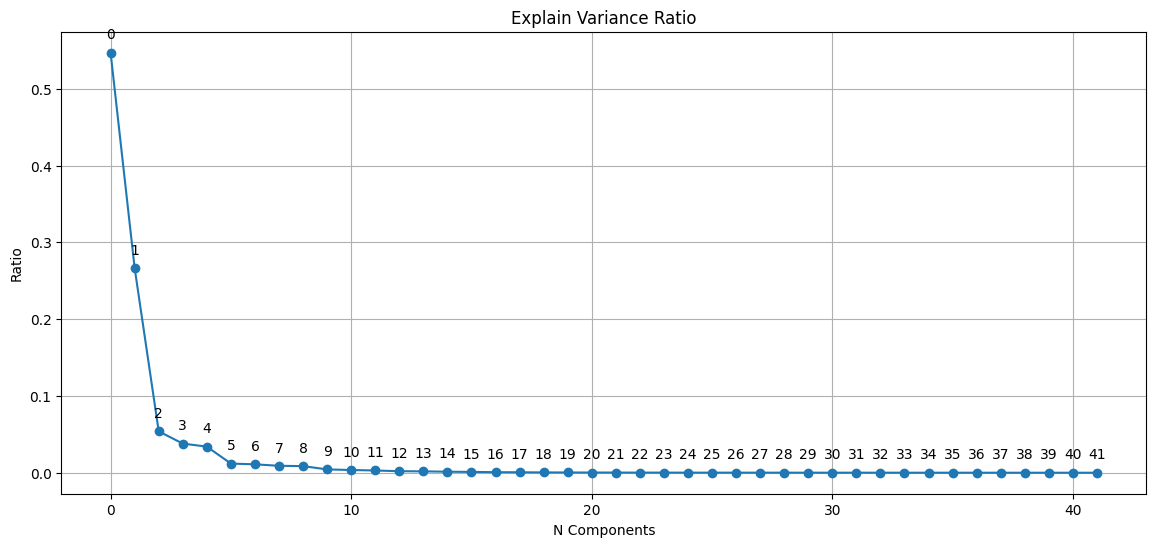

In [42]:
def explain_variance_ratio(X: pd.DataFrame):
    x_centered = X - X.mean()                       # Standarisasi Data
    cov_matrix = np.cov(x_centered, rowvar=False)   # Pilih variasi matrix dari datasets
    eigenvalues, _ = np.linalg.eigh(cov_matrix)     # Nilai eigenvalues dari variasi matrix
    
    sorted_indices = np.sort(eigenvalues)[::-1]     # Sorting Nilai eigenvalues dari terbesar ke terkecil
    total = sorted_indices.sum()
    
    return sorted_indices / total

evr = explain_variance_ratio(X_train)
cumsum = np.cumsum(evr)

plt.figure(figsize=(14, 6))
plt.title("Explain Variance Ratio")
plt.plot(evr, marker="o")
plt.xlabel("N Components")
plt.ylabel("Ratio")

for i, y in enumerate(evr):
    plt.annotate(str(i), (i, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.grid(True)
plt.show()

Fungsi Explain Variance Ratio digunakan untuk mendapatkan nilai n_components berdasarkan variasi-variasi dari features.

#### Build PCA


In [43]:
def pca(X: pd.DataFrame, n_components: int):
    x_centered = X - X.mean()                                       # Standarisasi Data
    cov_matrix = np.cov(x_centered, rowvar=False)                   # Pilih variasi matrix dari datasets
    eigenvalues, eigenmatrix = np.linalg.eigh(cov_matrix)           # Nilai eigenvalues dari variasi matrix
    
    sorted_eigenvalues = np.argsort(eigenvalues)[::-1]              # Sorting nilai eigenvalues dari terbesar ke terkecil
    sorted_eigenmatrix = eigenmatrix[:, sorted_eigenvalues]         # Sorting nilai eigenmatrix berdasarkan eigenvalues
    
    principal_components = sorted_eigenmatrix[:, :n_components]     # Pilih eigenmatrix yg sudah di sort berdasarkan n_components
    
    X_pca = np.dot(x_centered, principal_components)                # Kali silang matrix
    return pd.DataFrame(X_pca)

X_train_pca = pca(X_train, n_components=3)
X_test_pca = pca(X_test, n_components=3)

X_train_pca.head(10)

,0,1,2
0,-1143.035099,906.857762,6.181307
1,13.759720,-258.194615,133.783031
2,-185.223150,362.226682,-87.552105
3,-96.910793,459.662534,56.697229
4,299.525954,-65.707166,186.902910
5,518.823142,-260.477423,-15.305267
6,186.405589,29.494440,1.090198
7,204.577018,-20.948346,-193.065015
8,-95.127350,-29.760375,83.798709
9,1028.691138,-439.974404,200.328882


## Build KNN models <br>
1. Hitung semua jarak test dengan train
2. Urutkan jarak-jarak lalu ambil class label dengan cangkupan K
3. Lakukan voting, jika voting menghasilkan kandidat yang sama, maka akan ada opsi pemilihan lagi:
   - "default" ambil paling cepat paling baik
   - "sort" ambil data dengan nilai terkcil
   - "random_choice" pilih secara acak

Fitur tambahan:
Selain voting ada fitur penghitungan bobot berdasarkan jarak terdekat, jika bobot paling dekat dan banyak class yang dominan dari class indominan maka class tersebut yang akan di pilih. Setelah di pilih berdasarkan cangkupan K maka akan di lakukan voting.

##### Jenis-jenis distance<br>
1. Euclidean
   Menghitung jarak secara garis lurus atau linear, dengan rumus seperti ini
   $$
   D(a, b) = \sqrt{\sum_i (a_i - b_i)^2}
   $$

2. Manhattan
   Menghitung jarak secara belok-belok, dengan rumus seperti ini
   $$
   D(a, b) = \sum_i |a_i - b_i|
   $$

3. Minkowski
   Menghitung jarak secara lurus namun berbelok, karena minkowski ini adalah distance versi generalisasi dari Euclidean dan Manhattan, bisa di lihat dari rumus ini:
   $$
   D(a, b) = \left( \sum_i |a_i - b_i|^p \right) ^{1/p}
   $$

$a$ adalah data X_test<br>
$b$ adalah semua data X_train

In [44]:
class KNN:
    def __init__(self, k: int, p: int, weight, voting:str = "default"):
        self.k = k              # Nilai K untuk mencangkup NN
        self.p = p              # Nilai P untuk tipe distance
        self.weight = weight    # weight untuk tipe pembobotan
        self.voting = voting    # voting untuk jenis voting
    
    def fit(self, X_train: pd.DataFrame, y_train: pd.DataFrame):
        # Set nilai train & testing
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()
        
    def _minkowski_distance(self, a, b):
        # Minkowski distance karena generalisasi dari Euclidean(2) dan Manhattan(1) distance
        return np.power(np.sum(np.abs(a - b) ** self.p, axis=1), 1 / self.p)
    
    def _get_nn(self, X_test: pd.DataFrame):
        distance = self._minkowski_distance(X_test, self.X_train)       # Hitung semua jarak test dengan train
        k_idxs = np.argsort(distance)[: self.k]                         # Urutkan dan cangkup class label berdasarkan K
        k_labels = [self.y_train[i] for i in k_idxs]                    # class-class label
        k_distance = [distance[i] for i in k_idxs]                      # dapatkan kembali distance namun sudah urut
        
        if self.weight == "uniform":                                    # Voting saja
            # Hitung berapa banyak jumlah kandidat dan lakukan voting
            values, counts = np.unique(k_labels, return_counts=True)
            max_count = max(counts)
            candidates = values[counts == max_count]
            
            if self.voting == "default":
                if len(candidates) > 1:
                    return np.random.choice(candidates)
                else:
                    return candidates[0]
            elif self.voting == "sort":
                if len(candidates) > 1:
                    return np.random.choice(candidates)
                else:
                    return sorted(candidates)[0]
            else:
                raise ValueError("\"voting\" argument doesn't match in options!")
        
        
        
        elif self.weight == "distance":                                 # Hitung pembobotan dan voting
            weights = [(1 / (d + 1e-5)) for d in k_distance]
        
        elif callable(self.weight):                                     # Custom distance
            weights = [self.weight(d) for d in k_distance]
        
        else:
            raise ValueError("\"voting\" argument doesn't match in options!")
        
        # Hitung berapa banyak jumlah kandidat berdasarkan bobot dan lakukan voting
        label_weights = dict()
        for label, weight in zip(k_labels, weights):
            label_weights[label] = label_weights.get(label, 0) + weight
        
        max_weight = max(label_weights.values())
        candidates = [label for label, weight in label_weights.items() if weight == max_weight]
        
        if self.voting == "default":
            if len(candidates) > 1:
                return np.random.choice(candidates)
            else:
                return candidates[0]
        elif self.voting == "sort":
            if len(candidates) > 1:
                return np.random.choice(candidates)
            else:
                return sorted(candidates)[0]
        else:
            raise ValueError("\"voting\" argument doesn't match in options!")
        
    def predict(self, X_test: pd.DataFrame):
        return np.array([
            self._get_nn(x)
            for x in X_test.to_numpy()
        ])

## Evaluation Model<br>
Matrix-matrix evaluasi model
1. Accuracy
   Menghitung semua jumlah benar dan salah baik class positif dan negatif lalu bagi jumlah data<br>
   $A = \frac{totalbenar}{jumlahdata}$

2. Precision
   Menghitung semua jumlah benar (positif) dan di bagi semua prediksi<br>
   $P = \frac{TP}{TP + FP}$

3. Recall<br>
   Menghitung semua jumlah benar (positif) dan di bagi semua dari datasets<br>
   $R = \frac{TP}{TP + FN}$

4. F1-Score<br>
   Nilai harmonik dari Precision dan Recall<br>
   $F1 = 2 \cdot \frac{PR}{P+R}$

Metode support lainnya:
- Macro Avg<br>
  Menghitung nilai rata-rata dari precision, recall dan F1-Score<br>
  $MA = \frac{P+R+F1}{3}$

- Weighted Avg<br>
  Sama seperti macro avg namun berdasarkan bobot per-class<br>
  $WA = \sum_i (\frac{w_i}{\sum_j w_{ji}}) \cdot X_i$

In [45]:
class EvaluationModel:
    def __init__(self, y_true: pd.DataFrame, y_pred: np.ndarray):
        self.y_true = y_true # Data dari datasets
        self.y_pred = y_pred # Data dari hasil prediksi model
    
    def accuracy(self):
        return np.sum(self.y_true == self.y_pred) / len(self.y_true)
    
    def precision(self, TP, FP):
        return TP / (TP + FP) if (TP + FP) != 0 else 0
    
    def recall(self, TP, FN):
        return TP / (TP + FN) if (TP + FN) != 0 else 0
    
    def f1_score(self, TP, FP, FN):
        P = self.precision(TP, FP)
        R = self.recall(TP, FN)
        
        return 2 * (P * R) / (P + R) if (P + R) != 0 else 0
    
    def macro_avg(self, report_df: pd.DataFrame):
        return report_df[["Precision", "Recall", "F1-Score"]].mean()
    
    def weighted_avg(self, report_df: pd.DataFrame):
        class_vc = self.y_true.value_counts()
        total_samples = len(self.y_true)
        
        weighted_dict = dict()
        for col in ["Precision", "Recall", "F1-Score"]:
            weighted_sum = 0
            for i, row in report_df.iterrows():
                if row["Category"] not in ["macro avg", "weighted avg"]:
                    cat = row["Category"]
                    cat_weight = class_vc.get(cat, 0) / total_samples
                    weighted_sum += cat_weight * row[col]
            
            weighted_dict[col] = weighted_sum
        
        return weighted_dict
    
    def make_report(self):
        cats = pd.Series(self.y_true).unique()
        report_dict = {"Category": [], "Precision": [], "Recall": [], "F1-Score": []}
        
        for cat in cats:
            # Confusion matrixs
            TP = np.sum((self.y_true == cat) & (self.y_pred == cat)) # Asli POSITIF prdiksi POSITIF
            TN = np.sum((self.y_true != cat) & (self.y_pred != cat)) # Asli NEGATIF prdiksi NEGATIF
            FP = np.sum((self.y_true != cat) & (self.y_pred == cat)) # Asli NEGATIF prdiksi POSITIF
            FN = np.sum((self.y_true == cat) & (self.y_pred != cat)) # Asli POSITIF prdiksi NEGATIF
            
            # Calculation matrixs
            P = self.precision(TP, FP)
            R = self.recall(TP, FN)
            F1 = self.f1_score(TP, FP, FN)
            
            # Append matrixs
            report_dict["Category"].append(cat)
            report_dict["Precision"].append(P)
            report_dict["Recall"].append(R)
            report_dict["F1-Score"].append(F1)
        
        accuracy = self.accuracy()
        
        report_df = pd.DataFrame(report_dict)
        macro_avg = self.macro_avg(report_df)
        weighted_avg = self.weighted_avg(report_df)
        
        summary_df = pd.DataFrame.from_records([
            {"Category": "macro avg", **macro_avg},
            {"Category": "weighted avg", **weighted_avg}
        ])
        
        result_df = pd.concat([report_df, summary_df], ignore_index=True)
        
        return result_df, accuracy

## Implements model & Evaluation (Random choice)

In [ ]:
model_1 = KNN(k=7, p=3, weight="distance", voting="default")
model_1.fit(X_train=X_train_std_scaler, y_train=y_train)

preds = model_1.predict(X_test=X_test_std_scaler)

# Evaluatio
eval_model = EvaluationModel(y_true=y_test, y_pred=preds)
report_df, accuracy = eval_model.make_report()

print(f"Accuracy model 1: {accuracy*100:.2f}%")
report_df

Accuracy model 1: 94.64%


,Category,Precision,Recall,F1-Score
0,7,0.975092,0.984171,0.979611
1,16,0.946888,0.954013,0.950437
2,0,0.964896,0.946927,0.955827
3,9,0.950533,0.922787,0.936455
4,22,0.892920,0.931671,0.911884
5,6,0.945034,0.937799,0.941402
6,5,0.968921,0.970696,0.969808
7,23,0.986239,0.964126,0.975057
8,14,0.967407,0.990144,0.978644
9,17,0.892891,0.880374,0.886588


## Search Grid CV Hypertunning Parameter

In [47]:
def logging_tunning(params: dict, index: int, total: int):
    separator = "=" * 100
    text_process = f"[{index}/{total}] [{index / total*100:.2f}%]"
    
    print(separator)
    print(text_process)
    print(params)
    print(separator)

def hypertunning_parameter(params: dict, limit_data: int = None):
    total_loop = (
        len(params["K"]) *
        len(params["P"]) *
        len(params["weight"]) *
        len(params["voting"]) *
        len(params["scaler"])
    )
    count = 0
    
    param_list = list()
    
    for k in params["K"]:
        for p in params["P"]:
            for weight in params["weight"]:
                for voting in params["voting"]:
                    for i, (train, test) in enumerate(params["scaler"]):
                        # Initialization model
                        model = KNN(k=k, p=p, weight=weight, voting=voting)
                        model.fit(X_train=train[:limit_data], y_train=y_train[:limit_data])
                        
                        preds = model.predict(X_test=test[:limit_data])
                        
                        # Evaluation model
                        eval_model = EvaluationModel(y_true=y_test[:limit_data], y_pred=preds)
                        report_df, accuracy = eval_model.make_report()
                        
                        # Append params
                        param_results = {
                            "K": k,
                            "P": p,
                            "weight": weight,
                            "voting": voting,
                            "scaler": i,
                        }
                        
                        param_list.append({
                            "accuracy": accuracy,
                            "report_df": report_df,
                            "params": param_results
                        })
                        
                        logging_tunning(param_results, count, total_loop)
                        count += 1
                        
    return param_list

### Search parameters

In [48]:
from IPython.display import display

def custom_distance(d):
    return (1 / (d**2 + 1e-5))

params = {
    "K": range(3, 9),
    "P": range(1, 5),
    "weight": ["uniform", "distance", custom_distance],
    "voting": ["default", "sort"],
    "scaler": [
        (X_train_mm_scaler, X_test_mm_scaler),
        (X_train_std_scaler, X_test_std_scaler),
        (X_train_pca, X_test_pca),
        (X_train, X_test)
    ]
}

param_result = hypertunning_parameter(params=params, limit_data=3000)

# Preview
sorted_params = sorted(param_result, key=lambda x: x["accuracy"], reverse=True)[:3]
        
for row in sorted_params:
    display(row["report_df"])
    print(f"Accuracy: {row["accuracy"]}")
    print(f"Params: {row["params"]}")

[0/576] [0.00%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'default', 'scaler': 0}
[1/576] [0.17%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'default', 'scaler': 1}
[2/576] [0.35%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'default', 'scaler': 2}
[3/576] [0.52%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'default', 'scaler': 3}
[4/576] [0.69%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'sort', 'scaler': 0}
[5/576] [0.87%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'sort', 'scaler': 1}
[6/576] [1.04%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'sort', 'scaler': 2}
[7/576] [1.22%]
{'K': 3, 'P': 1, 'weight': 'uniform', 'voting': 'sort', 'scaler': 3}
[8/576] [1.39%]
{'K': 3, 'P': 1, 'weight': 'distance', 'voting': 'default', 'scaler': 0}
[9/576] [1.56%]
{'K': 3, 'P': 1, 'weight': 'distance', 'voting': 'default', 'scaler': 1}
[10/576] [1.74%]
{'K': 3, 'P': 1, 'weight': 'distance', 'voting': 'default', 'scaler': 2}
[11/576] [1.91%]
{'K': 3, 'P': 1, 'weigh

,Category,Precision,Recall,F1-Score
0,7,0.888000,0.888000,0.888000
1,16,0.692308,0.812030,0.747405
2,0,0.893805,0.808000,0.848739
3,9,0.745283,0.705357,0.724771
4,22,0.642336,0.758621,0.695652
5,6,0.766667,0.671533,0.715953
6,5,0.785185,0.834646,0.809160
7,23,0.909091,0.808824,0.856031
8,14,0.949640,0.949640,0.949640
9,17,0.623762,0.543103,0.580645


Accuracy: 0.774
Params: {'K': 3, 'P': 3, 'weight': <function custom_distance at 0x00000219A1EEB920>, 'voting': 'default', 'scaler': 3}


,Category,Precision,Recall,F1-Score
0,7,0.888000,0.888000,0.888000
1,16,0.692308,0.812030,0.747405
2,0,0.893805,0.808000,0.848739
3,9,0.745283,0.705357,0.724771
4,22,0.642336,0.758621,0.695652
5,6,0.766667,0.671533,0.715953
6,5,0.785185,0.834646,0.809160
7,23,0.909091,0.808824,0.856031
8,14,0.949640,0.949640,0.949640
9,17,0.623762,0.543103,0.580645


Accuracy: 0.774
Params: {'K': 3, 'P': 3, 'weight': <function custom_distance at 0x00000219A1EEB920>, 'voting': 'sort', 'scaler': 3}


,Category,Precision,Recall,F1-Score
0,7,0.896000,0.896000,0.896000
1,16,0.694805,0.804511,0.745645
2,0,0.901786,0.808000,0.852321
3,9,0.747573,0.687500,0.716279
4,22,0.654412,0.767241,0.706349
5,6,0.747967,0.671533,0.707692
6,5,0.823077,0.842520,0.832685
7,23,0.916667,0.808824,0.859375
8,14,0.956835,0.956835,0.956835
9,17,0.614583,0.508621,0.556604


Accuracy: 0.7726666666666666
Params: {'K': 3, 'P': 4, 'weight': <function custom_distance at 0x00000219A1EEB920>, 'voting': 'default', 'scaler': 3}


Hasil akurasi turun karena jumlah sampel yang digunakan hanya __5000 sampel__. <br>Sedangkan pada pemilihan acak menggunakan __semua sampel__ pada datasets.

### Use params for all data

In [51]:
model_final = KNN(k=3, p=3, weight=custom_distance, voting="default")
model_final.fit(X_train=X_train_std_scaler, y_train=y_train)

preds = model_final.predict(X_test=X_test_std_scaler)

# Evaluation
eval_model = EvaluationModel(y_true=y_test, y_pred=preds)
report_df, accuracy = eval_model.make_report()

print(f"Accuracy model final: {accuracy*100:.2f}%")
report_df

Accuracy model final: 98.22%


,Category,Precision,Recall,F1-Score
0,7,0.993500,0.996276,0.994886
1,16,0.975793,0.977425,0.976608
2,0,0.989681,0.982309,0.985981
3,9,0.986692,0.977401,0.982025
4,22,0.968548,0.966759,0.967652
5,6,0.982759,0.981818,0.982288
6,5,0.992694,0.995421,0.994056
7,23,0.996370,0.984753,0.990528
8,14,0.990971,0.998484,0.994713
9,17,0.956441,0.964486,0.960447


Akurasi sampai mencapai __98%__<br>
Mengapa sampai setinggi itu? Kemungkinan Datasets yang di berikan memiliki pola yang sangat mudah untuk model pelajari.

In [57]:
df.head(3)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,459.426,638.641,347.614,599.550,273.522,486.969,262.374,354.810,248.102,248.011,...,471.021,587.605,425.540,598.047,337.165,559.660,410.858,548.164,455.238,A
2,444.194,659.268,326.598,616.910,253.226,497.914,243.082,361.876,239.491,259.676,...,476.613,560.803,418.030,567.584,346.090,533.656,416.844,524.283,450.811,A
3,443.780,650.429,324.970,607.825,252.818,487.201,244.345,356.561,243.655,256.638,...,473.187,573.173,418.568,580.205,339.026,541.187,411.295,528.062,445.777,A


In [59]:
df.tail(3)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
32846,461.909,469.288,400.524,424.948,372.224,372.311,353.600,310.913,326.736,261.919,...,394.474,534.607,373.414,555.518,319.473,570.948,285.517,586.932,256.553,Y
32847,451.633,470.803,393.561,427.040,365.993,371.472,349.987,306.755,324.605,257.534,...,390.126,524.399,378.125,548.321,321.545,566.286,289.032,585.819,261.687,Y
32848,446.508,479.837,383.399,422.028,364.069,359.685,355.280,293.822,331.258,249.500,...,394.919,523.860,381.711,546.956,325.058,560.955,297.564,581.282,276.208,Y
